Before beginning, we need to load in all of the necessary packages.  

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Part A

First, we will run the code given in the instructions to start us off.  This sets parameters (like the number of classes (digits), n_neighbors, etc, and also loads in and prepares the data.  Then we are able to visualize the data.  In addition, the code initializes a place to store the computation times (ctime) and a file name where those times will be stored as a CSV.  

1083


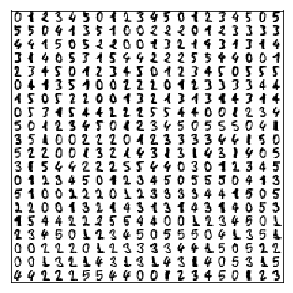

In [2]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
print(n_samples)
#
# visualizing input data
#
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=plt.cm.binary);
plt.xticks([]);
plt.yticks([]);

# compute time
ctime = np.zeros(8)

# set file name here
fname = 'ctime.csv'

Now, we continue with the code provided.  This section creates a function which plots the embedding results.  After this, we will run the actual code.  For each of the 8 methods, we will run it, time, it, and then use this function to plot it after the timer is over.  

In [3]:
# This is a handy plotting function we're going to use repeatedly
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])

    if title is not None:
        plt.title(title)
    plt.show()

## Principal Component Analysis (PCA)

Compute time = 0.05 sec


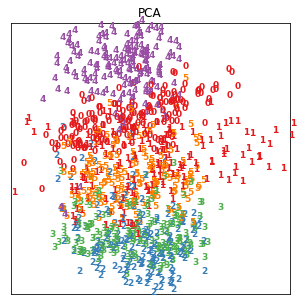

In [4]:
t0 = time()

svd = decomposition.TruncatedSVD(n_components=2)
X_r = svd.fit_transform(X)

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[0] = dt
plot_embedding(X_r, 'PCA')

## Multi Dimensional Scaling (MDS)

Compute time = 51.90 sec


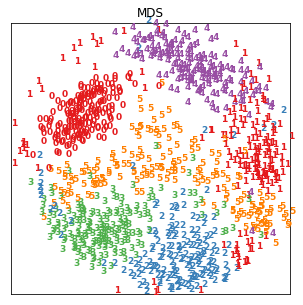

In [5]:
t0 = time()

embedding = manifold.MDS(n_components=2)
X_r = embedding.fit_transform(X)

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[1] = dt
plot_embedding(X_r, 'MDS')

## Isomap

Compute time = 2.96 sec


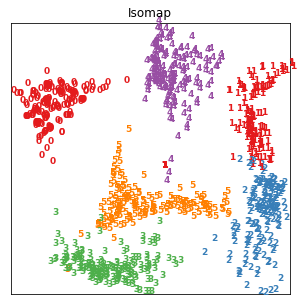

In [6]:
t0 = time()

embedding = manifold.Isomap(n_components=2)
X_r = embedding.fit_transform(X)

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[2] = dt
plot_embedding(X_r, 'Isomap')

## Spectral embedding

Compute time = 1.05 sec


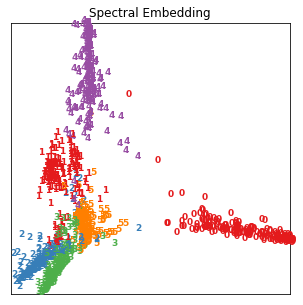

In [7]:
t0 = time()

embedding = manifold.SpectralEmbedding(n_components=2)
X_r = embedding.fit_transform(X)

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[3] = dt

plot_embedding(X_r, "Spectral Embedding")

# Locally Linear Embedding (LLE)

Compute time = 0.84 sec


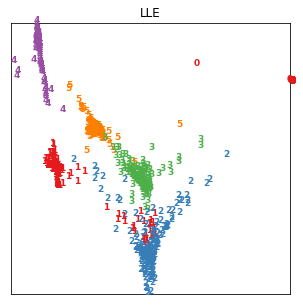

In [8]:
t0 = time()

X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

dt = time()-t0

print("Compute time = %.2f sec" % dt)

ctime[4] = dt
plot_embedding(X_r, 'LLE')

## Hessian Locally Linear Embedding (HLLE)

Compute time = 3.68 sec


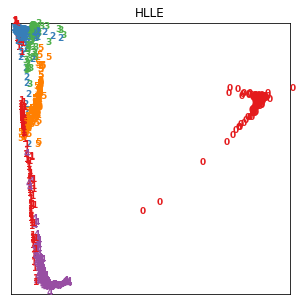

In [9]:
t0 = time()


X_r, err = manifold.locally_linear_embedding(X, n_neighbors, n_components=2, method = 'hessian')

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[5] = dt
plot_embedding(X_r, "HLLE")

## Local Tangent Space Allignment (LTSA)

Compute time = 2.06 sec


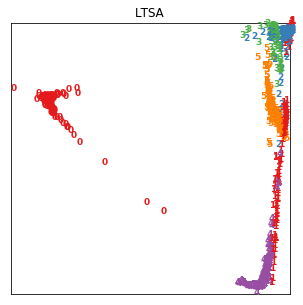

In [10]:
t0 = time()

X_r, err = manifold.locally_linear_embedding(X, n_neighbors, n_components=2, method = 'ltsa')

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[6] = dt
plot_embedding(X_r, 'LTSA')

## Stochastic Neighbor Embedding (t-SNE)

Compute time = 37.83 sec


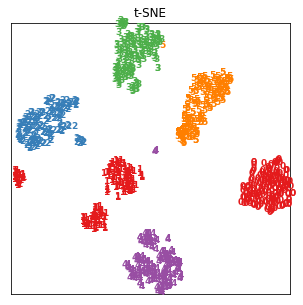

In [11]:
t0 = time()

X_r = manifold.TSNE(n_components=2).fit_transform(X)

dt = time() - t0

print("Compute time = %.2f sec" % dt)

ctime[7] = dt
plot_embedding(X_r, 't-SNE')

Now that each of those is done, we will save the times to the csv file "ctime.csv".  

In [12]:
np.savetxt(fname, ctime)

Now we will plot the time against the method in a bar chart.  This can be seen below.  

Text(0.5,1,'Computational Time Against Embedding Method (6 Digits, Full Data)')

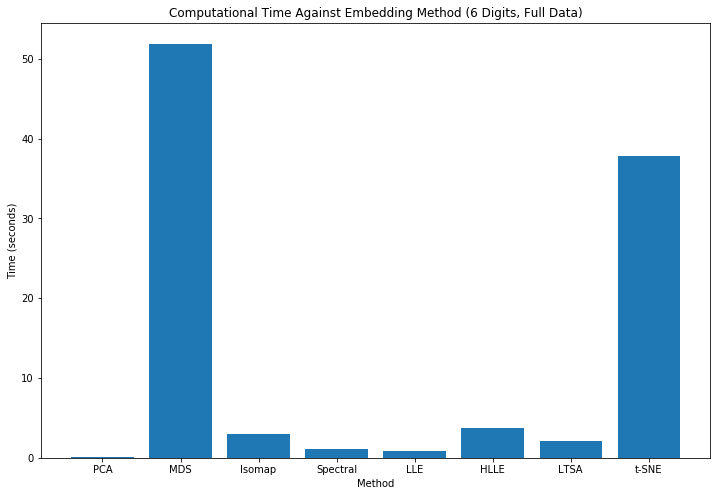

In [13]:
plt.rcParams["figure.figsize"] = [12,8]

Methods = ['PCA','MDS', 'Isomap', 'Spectral', 'LLE', 'HLLE', 'LTSA', 't-SNE']
plt.bar(Methods, ctime)
plt.ylabel('Time (seconds)')
plt.xlabel('Method')
plt.title('Computational Time Against Embedding Method (6 Digits, Full Data)')

Next we will re-run the code from above, but instead this time, we will only use half of the data and compare this to the computational time results above.  

In [14]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

HalfSize = round(X.shape[0] / 2)
ctimehalf = np.zeros(8)
fname = 'ctimehalf.csv'

###################################################

t0 = time()
svd = decomposition.TruncatedSVD(n_components=2)
X_r = svd.fit_transform(X[:HalfSize])
dt = time() - t0
ctimehalf[0] = dt

#################################################

t0 = time()
embedding = manifold.MDS(n_components=2)
X_r = embedding.fit_transform(X[:HalfSize])
dt = time() - t0
ctimehalf[1] = dt

################################################

t0 = time()
embedding = manifold.Isomap(n_components=2)
X_r = embedding.fit_transform(X[:HalfSize])
dt = time() - t0
ctimehalf[2] = dt

###############################################

t0 = time()
embedding = manifold.SpectralEmbedding(n_components=2)
X_r = embedding.fit_transform(X[:HalfSize])
dt = time() - t0
ctimehalf[3] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X[:HalfSize], n_neighbors=12, n_components=2)
dt = time()-t0
ctimehalf[4] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X[:HalfSize], n_neighbors, n_components=2, method = 'hessian')
dt = time() - t0
ctimehalf[5] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X[:HalfSize], n_neighbors, n_components=2, method = 'ltsa')
dt = time() - t0
ctimehalf[6] = dt

##############################################

t0 = time()
X_r = manifold.TSNE(n_components=2).fit_transform(X[:HalfSize])
dt = time() - t0
ctimehalf[7] = dt

#############################################

np.savetxt(fname, ctimehalf)



Now we'll make a similar bar chart of times against method.  

Text(0.5,1,'Computational Time Against Embedding Method - Half Data Points')

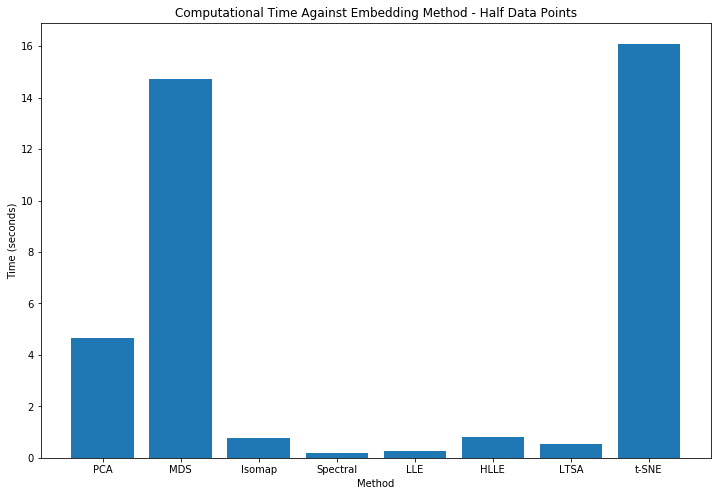

In [15]:
plt.bar(Methods, ctimehalf)
plt.ylabel('Time (seconds)')
plt.xlabel('Method')
plt.title('Computational Time Against Embedding Method - Half Data Points')

However, the two bar graphs are hard to compare, so we'll make another one where the two categories can be viewed side-by-side.  It should be noted that the half data set (rounded up) cuts the time by more than half.  This might be because every additional point complicates the whole process even more.  The fewer the points, the less that needs to be considered.  

Text(0.5,1,'Computational Time Against Embedding Method by Size of Data Set')

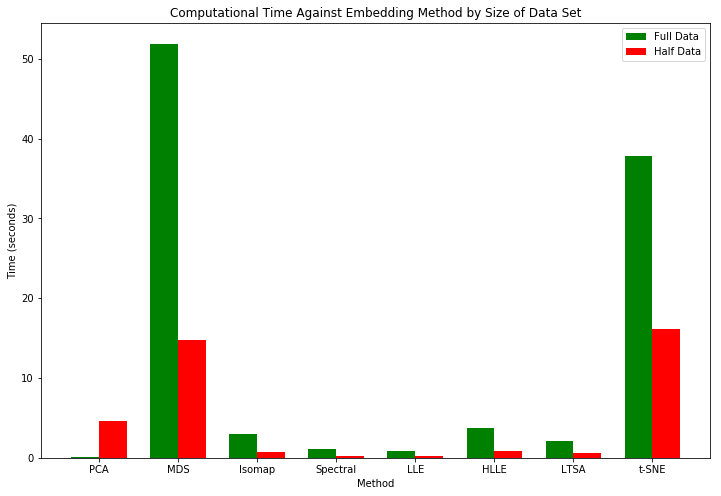

In [16]:
fig, ax = plt.subplots()

ind = np.arange(8)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, ctime, width, color='g')
p2 = ax.bar(ind + width, ctimehalf, width, color='r')

ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Methods)

ax.legend((p1[0], p2[0]), ('Full Data', 'Half Data'))
plt.ylabel('Time (seconds)')
plt.xlabel('Method')
plt.title('Computational Time Against Embedding Method by Size of Data Set')

Now we will do something similar, but instead of changing the amount of data, we are changing the number of classes to 10.  So we will run each method and time it again.  

In [17]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

ctime10dig = np.zeros(8)
fname = 'ctime10dig.csv'

###################################################

t0 = time()
svd = decomposition.TruncatedSVD(n_components=2)
X_r = svd.fit_transform(X)
dt = time() - t0
ctime10dig[0] = dt

#################################################

t0 = time()
embedding = manifold.MDS(n_components=2)
X_r = embedding.fit_transform(X)
dt = time() - t0
ctime10dig[1] = dt

################################################

t0 = time()
embedding = manifold.Isomap(n_components=2)
X_r = embedding.fit_transform(X)
dt = time() - t0
ctime10dig[2] = dt

###############################################

t0 = time()
embedding = manifold.SpectralEmbedding(n_components=2)
X_r = embedding.fit_transform(X)
dt = time() - t0
ctime10dig[3] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
dt = time()-t0
ctime10dig[4] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X, n_neighbors, n_components=2, method = 'hessian')
dt = time() - t0
ctime10dig[5] = dt

##############################################

t0 = time()
X_r, err = manifold.locally_linear_embedding(X, n_neighbors, n_components=2, method = 'ltsa')
dt = time() - t0
ctime10dig[6] = dt

##############################################

t0 = time()
X_r = manifold.TSNE(n_components=2).fit_transform(X)
dt = time() - t0
ctime10dig[7] = dt

#############################################

np.savetxt(fname, ctime10dig)



Now we'll plot the time against the method as we've done above.  

Text(0.5,1,'Computational Time Against Embedding Method - 10 Digits')

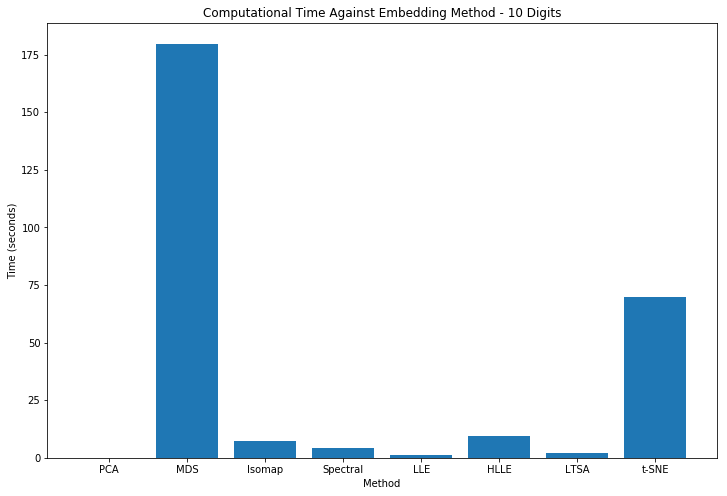

In [18]:
plt.bar(Methods, ctime10dig)
plt.ylabel('Time (seconds)')
plt.xlabel('Method')
plt.title('Computational Time Against Embedding Method - 10 Digits')

However, again, since this is really hard to compare to the original bar chart with only 6 classes, we will make a new bar chart with both categories side by side.  Just like the half data set cut down the time by more than half, the 10 classes more than doubles the time.  The models have to be more complicated because of the increased classes.  

Text(0.5,1,'Computational Time Against Embedding Method by Number of Digits')

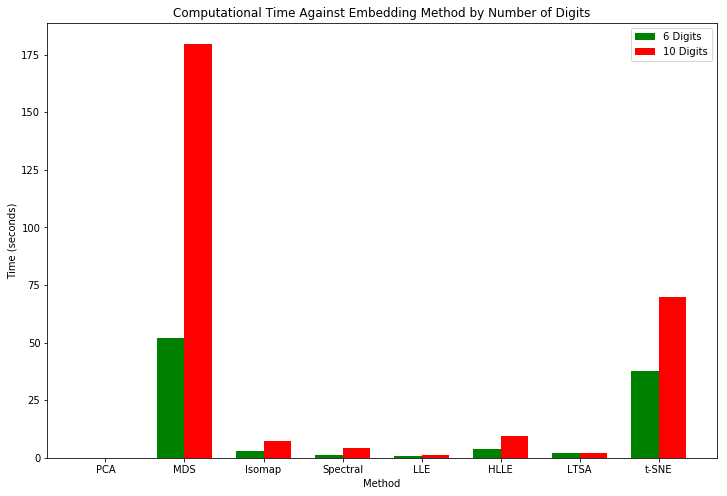

In [19]:
fig, ax = plt.subplots()

ind = np.arange(8)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, ctime, width, color='g')
p2 = ax.bar(ind + width, ctime10dig, width, color='r')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(Methods)

ax.legend((p1[0], p2[0]), ('6 Digits', '10 Digits'))
plt.ylabel('Time (seconds)')
plt.xlabel('Method')
plt.title('Computational Time Against Embedding Method by Number of Digits')

# Part B

### a) 
First, we load in each of the data sets as a dataframe.  Then we calculate the first differences of the data.  After that, we use numpy.linalg.svd to conduct singular value decomposition on each data set.  Then we calculate what fraction of the total variation is accounted for by the first three principal components for each data set.  The variation explained by a principal component is the eigenvalue for that vectore divided by the sum of the eigenvalues for all vectors.  The eigenvalues are calculated by the square of the second output value from the np.linalg.svd function.  After that is calculated, we show a vector which consists of the percentage of variation explained by each principal component in order so that we can look at the first 3 individually, and compare them to the others.  For each, the first is much bigger than any of the others, and it slowly drops off more and more for each successive component.  Then, below each of those vectors, we add the sum of the first 3.  For all of the data sets, the first 3 principal components explain about 96.99% or more of the variation.  

In [20]:
BBYields = pd.read_csv("BBYields.csv", index_col=0, parse_dates=True, infer_datetime_format=True)
CMYields = pd.read_csv("CMYields.csv", index_col=0, parse_dates=True, infer_datetime_format=True)
JGBYields = pd.read_csv("JGBYields.csv", index_col=0, parse_dates=True, infer_datetime_format=True)

BBDiff = (BBYields.diff()).iloc[1:,:]
CMDiff = (CMYields.diff()).iloc[1:,:]
JGBDiff = (JGBYields.diff()).iloc[1:,:]

U_BB, D_BB, P_BB = np.linalg.svd(BBDiff, full_matrices=False)
U_CM, D_CM, P_CM = np.linalg.svd(CMDiff, full_matrices=False)
U_JGB, D_JGB, P_JGB = np.linalg.svd(JGBDiff, full_matrices=False)

print('----------BB----------')
VarExplainedBB = D_BB**2 / sum(D_BB**2)
print(VarExplainedBB)
print(sum(VarExplainedBB[0:3]))

print('----------CM----------')
VarExplainedCM = D_CM**2 / sum(D_CM**2)
print(VarExplainedCM)
print(sum(VarExplainedCM[0:3]))

print('----------JGB----------')
VarExplainedJGB = D_JGB**2 / sum(D_JGB**2)
print(VarExplainedJGB)
print(sum(VarExplainedJGB[0:3]))

----------BB----------
[0.7970499  0.13673569 0.03612521 0.02223412 0.00517893 0.0014347
 0.00124145]
0.9699107963281882
----------CM----------
[0.8702511  0.08704083 0.02218118 0.00930307 0.00494314 0.00342353
 0.00285715]
0.9794731111431555
----------JGB----------
[0.82693914 0.10477467 0.03985855 0.01188033 0.00843387 0.00504818
 0.00306526]
0.9715723642645857


### b)
After this, we create both score and loading plots for each of the data sets of the first two principal components against one another.  These are shown below.  

Text(0.5,1,'BB Score plot of PC1 vs PC2')

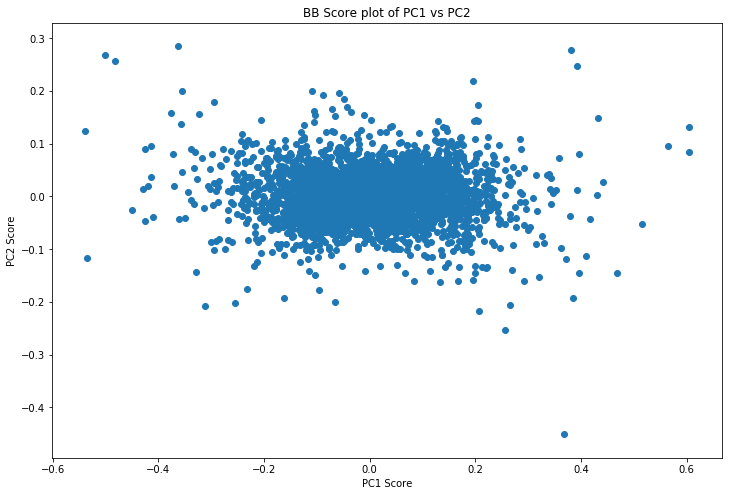

In [21]:
Score_BB = np.dot(U_BB, np.diag(D_BB))
plt.scatter(Score_BB[:,0], Score_BB[:,1])
plt.ylabel('PC2 Score')
plt.xlabel('PC1 Score')
plt.title('BB Score plot of PC1 vs PC2')

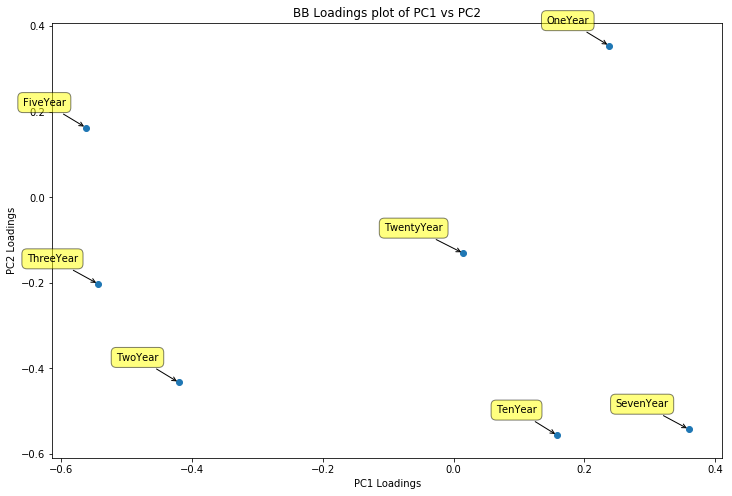

In [22]:
plt.scatter(P_BB[:,0], P_BB[:,1])
plt.ylabel('PC2 Loadings')
plt.xlabel('PC1 Loadings')
plt.title('BB Loadings plot of PC1 vs PC2')

for label, x, y in zip(list(BBYields), P_BB[:,0], P_BB[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0.5,1,'CM Score plot of PC1 vs PC2')

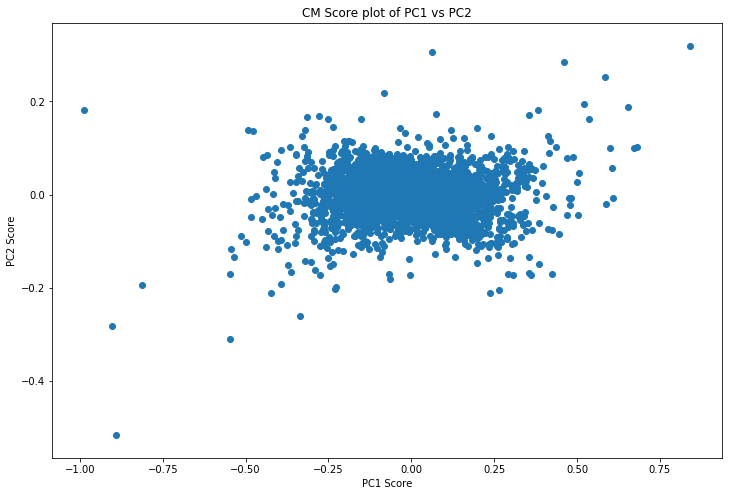

In [23]:
Score_CM = np.dot(U_CM, np.diag(D_CM))
plt.scatter(Score_CM[:,0], Score_CM[:,1])
plt.ylabel('PC2 Score')
plt.xlabel('PC1 Score')
plt.title('CM Score plot of PC1 vs PC2')

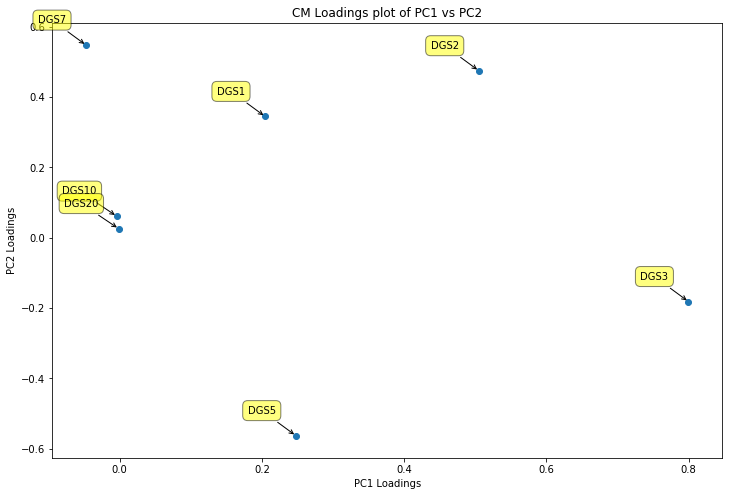

In [24]:
plt.scatter(P_CM[:,0], P_CM[:,1])
plt.ylabel('PC2 Loadings')
plt.xlabel('PC1 Loadings')
plt.title('CM Loadings plot of PC1 vs PC2')

for label, x, y in zip(list(CMYields), P_CM[:,0], P_CM[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0.5,1,'JGB Score plot of PC1 vs PC2')

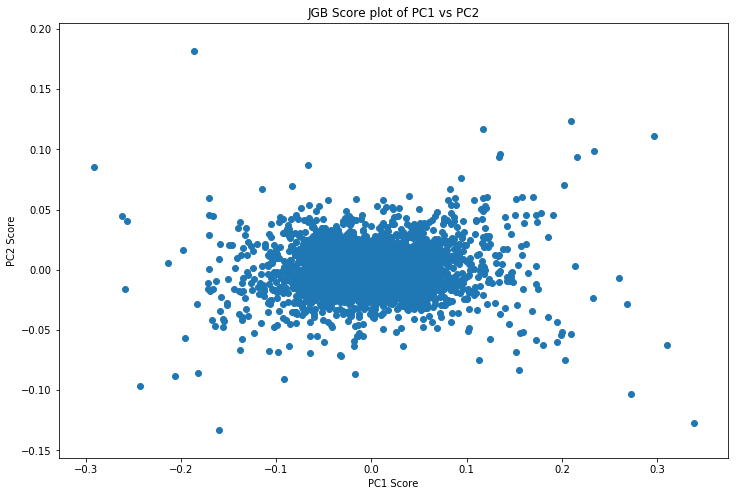

In [25]:
Score_JGB = np.dot(U_JGB, np.diag(D_JGB))
plt.scatter(Score_JGB[:,0], Score_JGB[:,1])
plt.ylabel('PC2 Score')
plt.xlabel('PC1 Score')
plt.title('JGB Score plot of PC1 vs PC2')

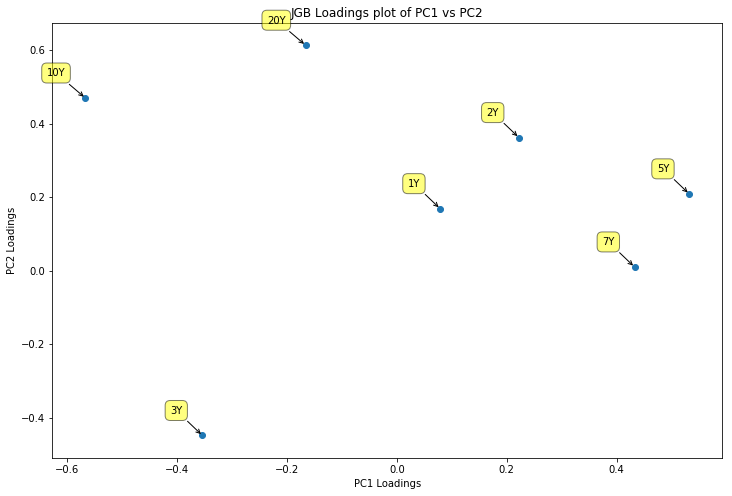

In [26]:
plt.scatter(P_JGB[:,0], P_JGB[:,1])
plt.ylabel('PC2 Loadings')
plt.xlabel('PC1 Loadings')
plt.title('JGB Loadings plot of PC1 vs PC2')

for label, x, y in zip(list(JGBYields), P_JGB[:,0], P_JGB[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### c)
Now we are going to make a 3 dimensional loading plot of the first 3 Principal components for JGB.  

Text(0.5,0.92,'JGB Loadings plot of PC1 vs PC2 v PC3')

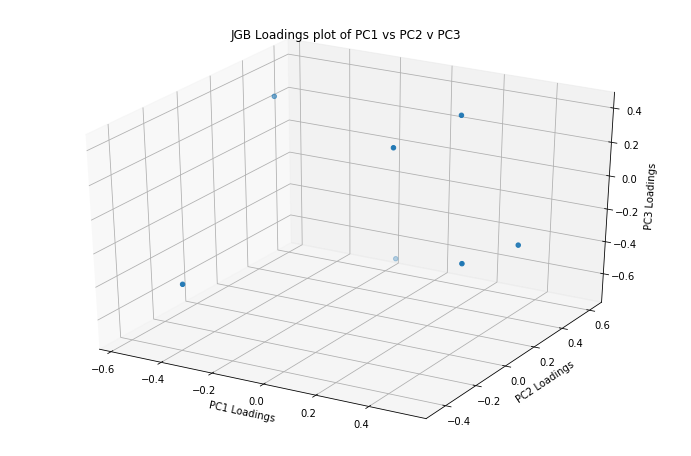

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = P_JGB[:,0], ys = P_JGB[:,1], zs = P_JGB[:,2], zdir='z')
plt.ylabel('PC2 Loadings')
plt.xlabel('PC1 Loadings')
ax.set_zlabel('PC3 Loadings')
plt.title('JGB Loadings plot of PC1 vs PC2 v PC3')

### d)
Now we are going to merge the data, and then make loadings plots of PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3 for the full data set.  

In [28]:
AllDiff = pd.concat([BBDiff, CMDiff, JGBDiff], axis=1, sort=False)
AllDiff = AllDiff.dropna()


U_all, D_all, P_all = np.linalg.svd(AllDiff, full_matrices=False)

Text(0.5,1,'Loadings plot of PC1 vs PC2 for all Data')

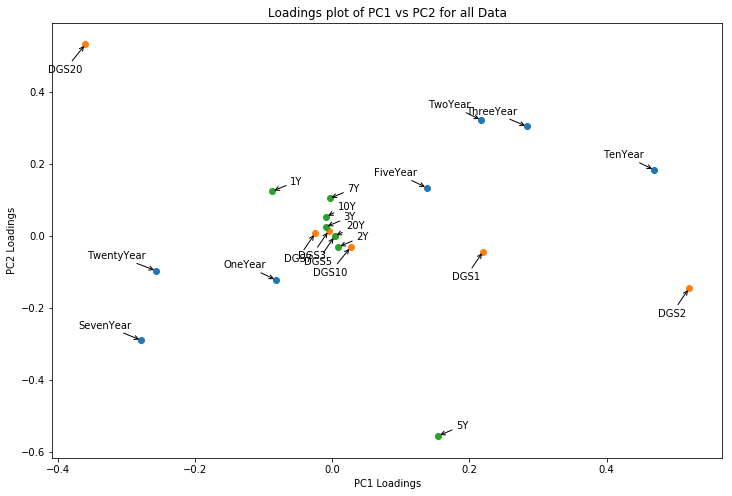

In [29]:
plt.scatter(P_all[0:7,0], P_all[0:7,1])

for label, x, y in zip(list(AllDiff)[0:7], P_all[0:7,0], P_all[0:7,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[7:14,0], P_all[7:14,1])

for label, x, y in zip(list(AllDiff)[7:14], P_all[7:14,0], P_all[7:14,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, -30),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[14:21,0], P_all[14:21,1])

for label, x, y in zip(list(AllDiff)[14:21], P_all[14:21,0], P_all[14:21,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(30, 5),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.ylabel('PC2 Loadings')
plt.xlabel('PC1 Loadings')
plt.title('Loadings plot of PC1 vs PC2 for all Data')


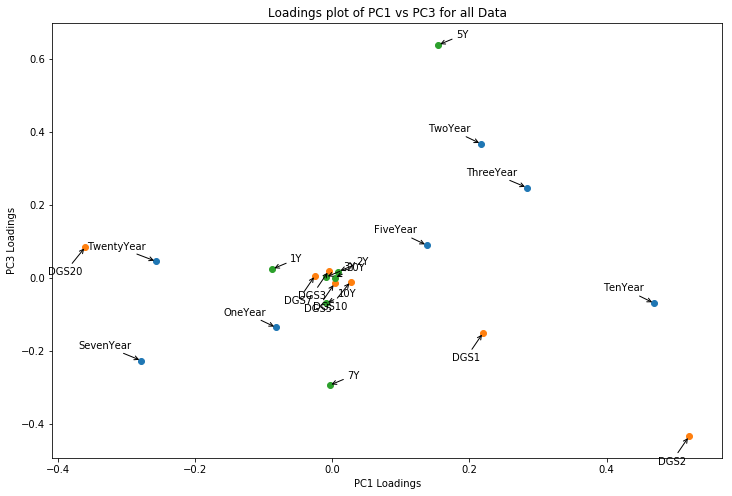

In [34]:
plt.scatter(P_all[0:7,0], P_all[0:7,2])

for label, x, y in zip(list(AllDiff)[0:7], P_all[0:7,0], P_all[0:7,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[7:14,0], P_all[7:14,2])

for label, x, y in zip(list(AllDiff)[7:14], P_all[7:14,0], P_all[7:14,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, -30),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[14:21,0], P_all[14:21,2])

for label, x, y in zip(list(AllDiff)[14:21], P_all[14:21,0], P_all[14:21,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(30, 5),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.ylabel('PC3 Loadings')
plt.xlabel('PC1 Loadings')
plt.title('Loadings plot of PC1 vs PC3 for all Data')


Text(0.5,1,'Loadings plot of PC2 vs PC3 for all Data')

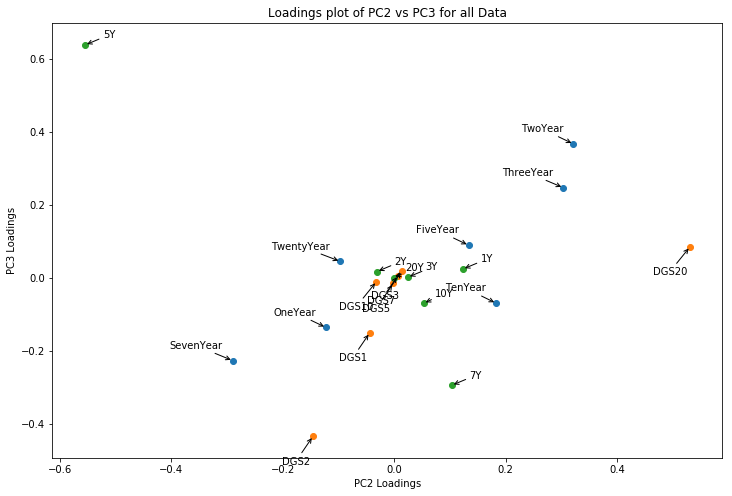

In [31]:
plt.scatter(P_all[0:7,1], P_all[0:7,2])

for label, x, y in zip(list(AllDiff)[0:7], P_all[0:7,1], P_all[0:7,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[7:14,1], P_all[7:14,2])

for label, x, y in zip(list(AllDiff)[7:14], P_all[7:14,1], P_all[7:14,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, -30),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(P_all[14:21,1], P_all[14:21,2])

for label, x, y in zip(list(AllDiff)[14:21], P_all[14:21,1], P_all[14:21,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(30, 5),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.ylabel('PC3 Loadings')
plt.xlabel('PC2 Loadings')
plt.title('Loadings plot of PC2 vs PC3 for all Data')
